### Project Proposal STAT 201 Group 4
# Proportion Inference of Suicide Attempts in Shandong, China using Bootstrapping

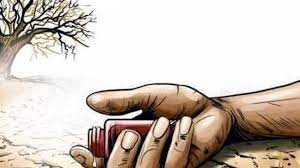

### Group 4: Eric Wei, Laksh Agarwal, Marie Samantha Fidelia, Yiting Sun

## Introduction

In recent years, suicide has become a worldwide public health concern with far-reaching consequences for individuals, community and even the entire society. After accounting for changes in population size and age demographics, there has been a 16% increase in the suicide rate between 2011 and 2022, resulting in an elevation from 12.3 to 14.4 fatalities per 100,000 individuals (Saunders & Panchal, 2023). Therefore, it is important to learn about the factors, triggers, and patterns related to suicide attempts so that they can be prevented effectively. In this project, we will focus on the effect of education levels on suicide risks. We will compare the proportion of suicide rates between primary and secondary education levels for females. A similar research has been done and demonstrated that “Men with a high school education were twice as likely to die by suicide compared with those with a college degree in 2014” (Phillips & Hempstead, 2017); however, we want to examine whether the same pattern will also apply to females.

The data set we chose is “Suicide Attempts in Shandong, China” from Kaggle. This data set records the information of suicide victims from 2009 to 2011 in Shandong, China. The local parameter of interest is the difference in proportion of suicide rate between two categories; which are primary and secondary education level. We will also calculate the standard deviation to investigate the sample variation.

To get started with our project, we will apply statistical inference to a dataset that was obtained from: https://www.kaggle.com/datasets/utkarshx27/suicide-attempts-in-shandong-china

The dataset is downloaded in a comma separated format. It contains 2571 rows of data, with 11 columns in which four are continuous variables (person_id, year, month, and age), and the rest are distinct variables. Several missing values are interpreted with an "unknown" label in the dataset. The aspects of education levels include: Iliterate, Primary (Grade 1 - 6), Secondary (Grade 7 - 12), and Tertiary (Bachelor's Degrees, Master's Degrees, and Doctoral Degrees). The following two variables will be considered for use in our inference:

* Sex ("Male"/"Female")
* Education ("Iliterate"/"Primary"/"Secondary"/"Tertiary")

#### Research Question: 
##### Is there a difference between the proportion of the suicide rates of women with primary and secondary education levels?        If so, what is the proportion of women in Shandong, corresponding to the education level with the higher suicide rate, that has attempted suicide?

## Preliminary Results

### Reading Our Dataset

We can start by importing the necessary libraries for our modelling

In [1]:
library(tidyverse) # For data cleaning, plotting, etc
library(knitr)     # For table centering and justify

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Let's read the chosen csv data with its column names into R 

In [2]:
suicide_data <- read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vS0cVcc1RNtcHpY9CnuzkvM_auEuA5HloYBi9MEciadHj4R3uNXNt7ORJwHSJjod85rHzIyigMmVIGy/pub?gid=1118541132&single=true&output=csv", col_names = TRUE) |>
                select(-Number)

glimpse(suicide_data)

Rows: 2571 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): Hospitalised, Died, Urban, Sex, Education, Occupation, method
dbl (5): Number, Person_ID, Year, Month, Age

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 2,571
Columns: 11
$ Person_ID    <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17…
$ Hospitalised <chr> "yes", "no", "no", "no", "yes", "no", "no", "yes", "no", …
$ Died         <chr> "no", "yes", "yes", "yes", "no", "yes", "yes", "no", "yes…
$ Urban        <chr> "no", "no", "no", "no", "no", "no", "no", "no", "no", "no…
$ Year         <dbl> 2010, 2009, 2010, 2011, 2009, 2009, 2010, 2010, 2010, 201…
$ Month        <dbl> 12, 3, 2, 1, 8, 11, 1, 10, 7, 1, 11, 3, 6, 1, 12, 2, 6, 5…
$ Sex          <chr> "female", "male", "male", "male", "male", "male", "female…
$ Age          <dbl> 39, 83, 60, 73, 51, 62, 90, 54, 66, 30, 77, 77, 79, 42, 6…
$ Education    <chr> "Secondary", "Primary", "Primary", "Primary", "Secondary"…
$ Occupation   <chr> "household", "farming", "farming", "farming", "farming", …
$ method       <chr> "Other poison", "Hanging", "Hanging", "Hanging", "Pestici…


### Cleaning and Wrangling Data Into Tidy Format

In [3]:
# Check for missing values in our data
missing <- filter(suicide_data, Education == "unknown") |>
           summarize(n = n())


<div align="center"> Table 1.1: Amount of Rows with Unknown Value 

|   n|
|---:|
| 80 | 

</div>

The tibble above shows that 80 rows are found to be having missing values of education.

Let's select the columns we need and then make sure that we filter out any missing values contained in our data

In [4]:
filtered_data <- suicide_data |>
                 select(Sex, Education) |>
                 filter(Education != "unknown")

<div align="center"> Table 1.2: Head of Filtered Data

<table style='margin-left: auto; margin-right: auto;'>
 <thead>
  <tr>
   <th style="text-align:center;"> Sex </th>
   <th style="text-align:center;"> Education </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:center;"> female </td>
   <td style="text-align:center;"> Secondary </td>
  </tr>
  <tr>
   <td style="text-align:center;"> male </td>
   <td style="text-align:center;"> Primary </td>
  </tr>
  <tr>
   <td style="text-align:center;"> male </td>
   <td style="text-align:center;"> Primary </td>
  </tr>
  <tr>
   <td style="text-align:center;"> male </td>
   <td style="text-align:center;"> Primary </td>
  </tr>
  <tr>
   <td style="text-align:center;"> male </td>
   <td style="text-align:center;"> Secondary </td>
  </tr>
  <tr>
   <td style="text-align:center;"> male </td>
   <td style="text-align:center;"> Iliterate </td>
  </tr>
</tbody>
</table>

</div>

### Visualizing the Data

Now let's visualize the data that we got!

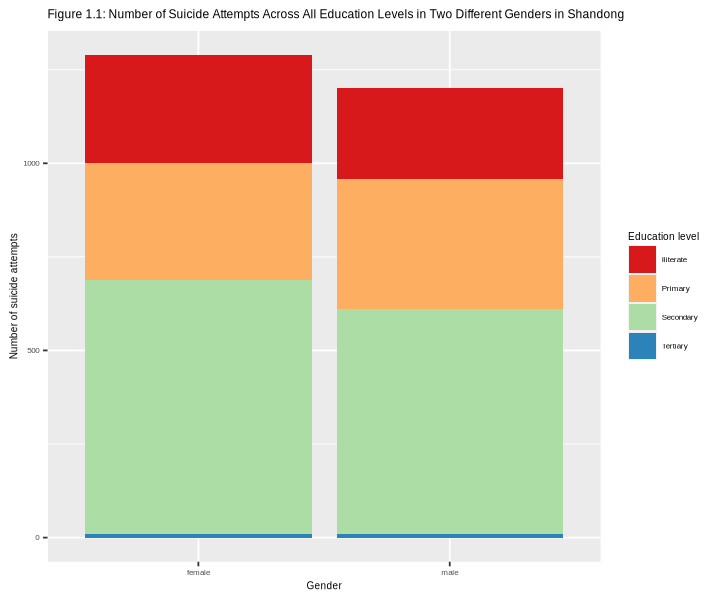

In [5]:
options(repr.plot.width = 6, repr.plot.height = 5)

bar_plot <- filtered_data |>
            ggplot(aes(x = Sex, y = 1, fill = Education)) + 
            geom_bar(stat = "identity", position = "stack") + 
            xlab("Gender") +
            ylab("Number of suicide attempts") +
            labs(fill = "Education level") +
            ggtitle("Figure 1.1: Number of Suicide Attempts Across All Education Levels in Two Different Genders in Shandong") +
            theme(text = element_text(size = 6)) +
            scale_fill_brewer(palette = 'Spectral')
bar_plot

### Computing Estimates

In [6]:
prop_table <- filtered_data |>
              group_by(Sex) |>
              summarize(n = n(),
              prop_iliterate = sum(Education == "Iliterate")/n,
              prop_primary = sum(Education == "Primary")/n, 
              prop_secondary = sum(Education == "Secondary")/n,
              prop_tertiary = sum(Education == "Tertiary")/n, 
              total_prop = prop_iliterate + prop_primary + prop_secondary + prop_tertiary) 

prop_table


Sex,n,prop_iliterate,prop_primary,prop_secondary,prop_tertiary,total_prop
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
female,1290,0.224031,0.2434109,0.5255814,0.006976744,1
male,1201,0.203164,0.2872606,0.5012490,0.008326395,1


<div align="center"> 
<caption>Table 1.3: Proportions of Female in Shandong That Had Attempted Suicide</caption>
<table style='margin-left: auto; margin-right: auto;'>
 <thead>
  <tr>
   <th style="text-align:center;"> sex </th>
   <th style="text-align:center;"> n </th>
   <th style="text-align:center;"> prop_iliterate </th>
   <th style="text-align:center;"> prop_primary </th>
   <th style="text-align:center;"> prop_secondary </th>
   <th style="text-align:center;"> prop_tertiary </th>
   <th style="text-align:center;"> total_prop </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:center;"> female </td>
   <td style="text-align:center;"> 1290 </td>
   <td style="text-align:center;"> 0.224031 </td>
   <td style="text-align:center;"> 0.2434109 </td>
   <td style="text-align:center;"> 0.5255814 </td>
   <td style="text-align:center;"> 0.0069767 </td>
   <td style="text-align:center;"> 1 </td>
  </tr>
</tbody>
</table>
</div>


Since the greatest difference in proportion is between males who finished a primary level of education and females who have finished a primary level of education we will explore this.


Let's create a visual representation of the above statistics to show a clear comparison!

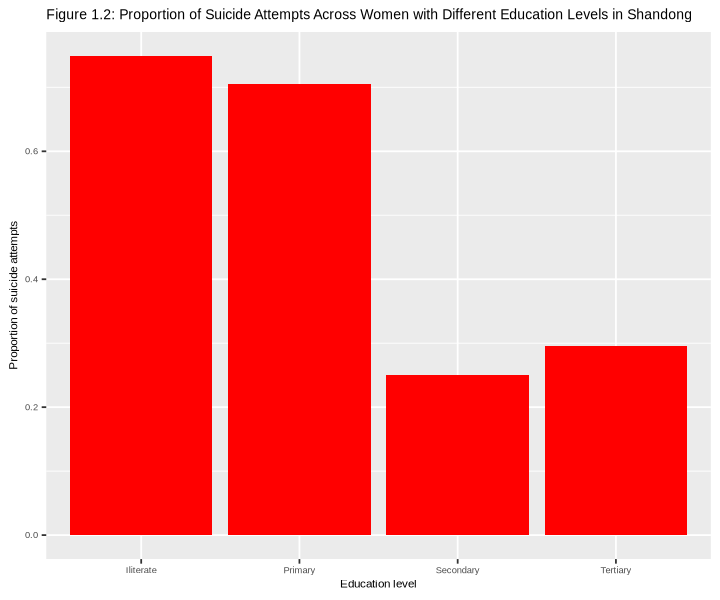

In [7]:
# 4x2 Data frame for bar plot
prop_values <- data.frame(prop = c("Iliterate", "Primary", "Secondary", "Tertiary"), 
                          value = c(prop_table$prop_iliterate, 
                                    prop_table$prop_primary, 
                                    prop_table$prop_secondary, 
                                    prop_table$prop_tertiary))

options(repr.plot.width = 6, repr.plot.height = 5)
female_bar_plot <- prop_values |>
                   ggplot(aes(x = prop, y = value)) + 
                   geom_bar(stat = "identity", fill = "red") + 
                   xlab("Education level") + 
                   ylab("Proportion of suicide attempts") +
                   ggtitle("Figure 1.2: Proportion of Suicide Attempts Across Women with Different Education Levels in Shandong") +
                   theme(text = element_text(size = 7))
female_bar_plot

From the sample that we had, it appears that women with secondary education have a higher proportion of suicide attempts than those with primary education in Shandong, China, with around 52.6% of the female population.

## Methods & Plans

This report is trustworthy because the dataset has a large sample size (2571). A large number of observations reduces “accident” such as the influence of outliers which helps to achieve more robust and reliable results. In addition, large sample size can lead to more precise estimates and predictions.

However, having said that, as presented above we can see that the proportion of females that have finished a secondary level of education are way more likely at risk of suicide than any other given education level. However the plots and estimates above pertain only to the given sample and might have variations that might not represent the true population of female suicides in Shandong. Thus we are going to try and bootstrap from this given dataset and produce two ways of checking our final statistic: 
1) A hypothesis test: 

Null hypothesis: $\widehat{p_{secondary}} - \widehat{p_{primary}} = 0$

Alternative hypothesis: $\widehat{p_{secondary}} - \widehat{p_{primary}} ≠ 0$

2) A confidence interval of 95% will be used to estimate the true population parameter. We are using the percentile method to calculate the confidence interval and we will do this by computing the 2.5th and 97.5th percentiles


##### What do you expect to find?

We expect to find a definite conclusion to the question of whether females with a secondary level of education are more at risk than females with a primary level of education or rather any level of education, as well as the range of proportion we are confident of that could represent the female population of Shandong.

##### What impact could such findings have?

This study's findings highlighting the higher proportion of suicide among individuals with secondary education could have significant implications for mitigating such incidents. Considering the impact of the education system in Shandong, China, particularly the notorious national examination (GaoKao), it becomes crucial to assess whether it contributes to these trends and if it adequately provides mental health resources for students and citizens. As the study is a bit old, the findings might be a bit outdated but it would incentivise for another study to be done on suicides in the Shandong region and hopefully empower the females of the region and provide them with the services need to take care of their mental health.

##### What future questions could this lead to?
We were particularly interested by the fact that one would think that the lowest level of education would have the highest levels of suicides due to perhaps not having the resources to take care of their mental health but in fact the highest proportion are those of secondary education which could arise questions such as:
1) Do individuals with primary education levels exhibit higher life satisfaction compared to those with secondary education?
2) Are women with secondary education more susceptible to depression and suicidal tendencies?
3) Could the education system in Shandong, China, particularly the notorious national examination (GaoKao), contribute to these trends, and does it provide adequate mental health resources for students and citizens?

## References

THEORY BASED METHODS - P-VALUE

To test $H_0$, we use the following test statistic:

$$
Z = \frac{\hat{p}_1 - \hat{p}_2}{\sqrt{\hat{p}(1-\hat{p})\left(\frac{1}{n_1} + \frac{1}{n_2}\right)}}
$$
where $\hat{p}_1$ and $\hat{p}_2$ are the sample proportions in samples 1 and 2, respectively; $n$ is the sample size; and $\hat{p}$ is the pooled proportion, given by: 

$$\hat{p} = \frac{n_1\hat{p}_1+n_2\hat{p}_2}{n_1+n_2}$$Heather Saunders and Nirmita Panchal. (2023, August 21). A look at the latest suicide data and change over the last decade. *KFF*. https://www.kff.org/mental-health/issue-brief/a-look-at-the-latest-suicide-data-and-change-over-the-last-decade/

Phillips, J. A., & Hempstead, K. (2017). Differences in U.S. suicide rates by educational attainment, 2000–2014. *American Journal of Preventive Medicine, 53(4)*. https://doi.org/10.1016/j.amepre.2017.04.010

Scholaro Database. (2023). Education system in China. *China Education System. (n.d.)*. https://www.scholaro.com/db/Countries/China/Education-System

Singh, U. (2023, May 6). *Suicide attempts in Shandong, China*. Kaggle. https://www.kaggle.com/datasets/utkarshx27/suicide-attempts-in-shandong-china

FINAL REPORT TINGS

To test $H_0$, we use the following test statistic:

$$
Z = \frac{\hat{p}_1 - \hat{p}_2}{\sqrt{\hat{p}(1-\hat{p})\left(\frac{1}{n_1} + \frac{1}{n_2}\right)}}
$$
where $\hat{p}_1$ and $\hat{p}_2$ are the sample proportions in samples 1 and 2, respectively; $n$ is the sample size; and $\hat{p}$ is the pooled proportion, given by: 

$$\hat{p} = \frac{n_1\hat{p}_1+n_2\hat{p}_2}{n_1+n_2}$$

FROM WORKSHEET 8, 3.4

In [8]:
p_hat_1 <- mean(filtered_data[filtered_data$Sex == "male", "Education"] == "Primary")
p_hat_2 <- mean(filtered_data[filtered_data$Sex == "female", "Education"] == "Primary")
n1 <- sum(filtered_data$Sex == "male")
n2 <- sum(filtered_data$Sex == "female")
p_hat <- (n1 * p_hat_1 + n2 * p_hat_2) / (n1 + n2)

test_statistic <- (p_hat_1 - p_hat_2) / (p_hat * (1 - p_hat) * (1/n1 + 1/n2))^0.5
test_statistic

[1] 2.47922

In [9]:
p_value <- pnorm(test_statistic,lower.tail = FALSE)
p_value
p_value * 100

[1] 0.006583507

[1] 0.6583507

THEORY BASED METHODS - GET CI - TUTORIAL 7 - Q4


In [10]:
p_summary <- filtered_data %>% 
             group_by(Sex, Education) %>% 
             summarise(p = n()) %>% 
             group_by(Sex) %>% 
             mutate(n = sum(p), p = p / sum(p)) %>% 
             filter(Education == 'Primary') %>% 
             select(-Education) %>% 
             pivot_wider(names_from = Sex, values_from = c(n,p))

p_summary

p_male <- mean(filtered_data[filtered_data$Sex == "male", "Education"] == "Primary")
p_female <- mean(filtered_data[filtered_data$Sex == "female", "Education"] == "Primary")
n_male <- sum(filtered_data$Sex == "male")
n_female <- sum(filtered_data$Sex == "female")
p_summary <- p_summary %>% 
             mutate(p_diff = p_male - p_female,
                    p_diff_std_error = sqrt(p_male*(1-p_male)/n_male + p_female*(1-p_female)/n_female))
p_summary
p_summary <- p_summary %>% 
             mutate(lower_ci = qnorm(0.025, p_diff, p_diff_std_error),
                    upper_ci = qnorm(0.975, p_diff, p_diff_std_error))
p_summary

`summarise()` has grouped output by 'Sex'. You can override using the `.groups`
argument.


n_female,n_male,p_female,p_male
<int>,<int>,<dbl>,<dbl>
1290,1201,0.2434109,0.2872606


n_female,n_male,p_female,p_male,p_diff,p_diff_std_error
<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1290,1201,0.2434109,0.2872606,0.04384976,0.01769852


n_female,n_male,p_female,p_male,p_diff,p_diff_std_error,lower_ci,upper_ci
<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1290,1201,0.2434109,0.2872606,0.04384976,0.01769852,0.009161309,0.07853822


THE CONFIDENCE INTERVAL PRESENTED IS ABOVE 0. 95% sure that the true proportion is within these intervals.

SIMULATION BASED METHODS - P VALUE AND CI

[1] "Not Primary" "Primary"

stat
<dbl>
0.04384976


p_value
<dbl>
0.011


lower_ci,upper_ci
<dbl>,<dbl>
0.009509056,0.0778992


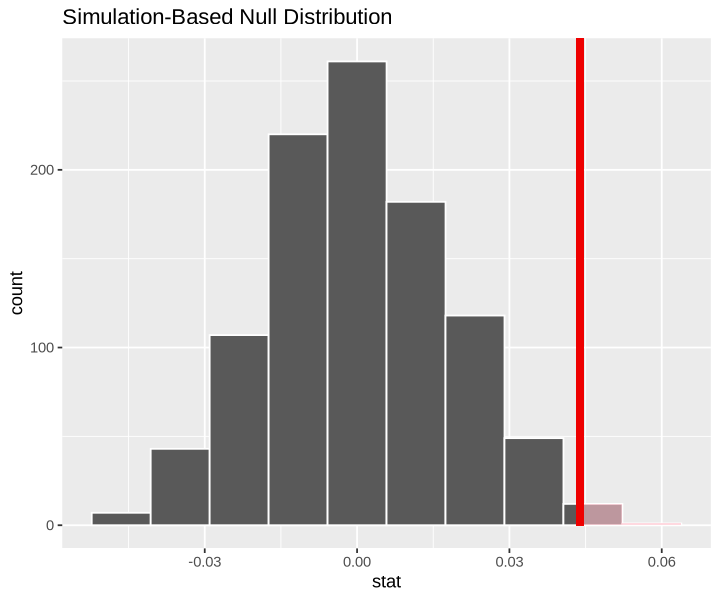

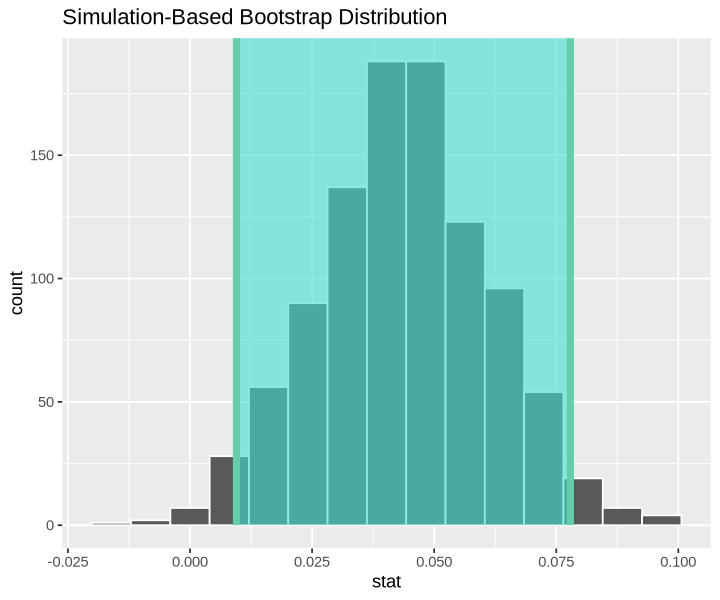

In [11]:

set.seed(123)
library(infer)
filtered_data_binary_education <- filtered_data
filtered_data_binary_education$Education[filtered_data_binary_education$Education != "Primary"] <- "Not Primary"

unique(filtered_data_binary_education$Education)
null_distribution <- filtered_data_binary_education %>% 
  specify(formula = Education ~ Sex, success = "Primary") %>% 
  hypothesize(null = "independence") %>% 
  generate(reps = 1000, type = "permute") %>% 
  calculate(stat = "diff in props", order = c("male", "female"))

obs_diff_prop <- filtered_data_binary_education %>% 
  specify(Education ~ Sex, success = "Primary") %>% 
  calculate(stat = "diff in props", order = c("male", "female"))
obs_diff_prop

null_distribution %>% visualize(bins = 10) + 
  shade_p_value(obs_stat = obs_diff_prop, direction = "right")

null_distribution %>% 
  get_p_value(obs_stat = obs_diff_prop, direction = "right")

bootstrap_dist <- filtered_data_binary_education %>% 
  specify(formula = Education ~ Sex, success = "Primary") %>% 
  generate(reps = 1000, type = "bootstrap") %>% 
  calculate(stat = "diff in props", order = c("male", "female"))

percentile_ci <- bootstrap_dist %>% 
  get_confidence_interval(level = 0.95, type = "percentile")
percentile_ci

visualize(bootstrap_dist) + 
  shade_confidence_interval(endpoints = percentile_ci)
